<a href="https://colab.research.google.com/github/vent0906/ww/blob/main/mnist_mlp_cnn_rnn_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MNIST Digit Classification using MLP, CNN, and RNN

This tutorial demonstrates three different neural network architectures to classify handwritten digits using the MNIST dataset.

## Code Directory

1. Load and Visualize MNIST Dataset  
2. Train a Multilayer Perceptron (MLP)  
3. Train a Convolutional Neural Network (CNN)  
4. Train a Recurrent Neural Network (RNN)  
5. Training Curves and Evaluation  


### 1. Load and Visualize MNIST Dataset

In [1]:

# Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


100%|██████████| 9.91M/9.91M [00:00<00:00, 17.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 476kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.41MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.8MB/s]


### Explanation:
We normalize the MNIST images and create data loaders for training and testing.

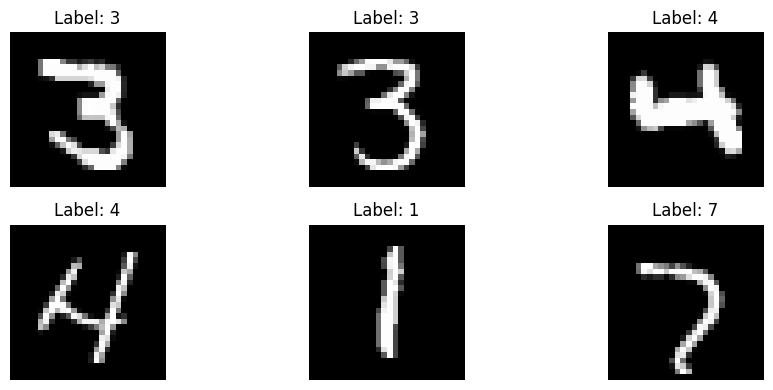

In [2]:

# Visualize some training samples
examples = enumerate(train_loader)
batch_idx, (sample_images, sample_labels) = next(examples)

plt.figure(figsize=(10, 4))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(sample_images[i][0], cmap='gray')
    plt.title(f"Label: {sample_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


### 2. Train a Multilayer Perceptron (MLP)

In [3]:

# Define SimpleMLP model
class SimpleMLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the image
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Model, criterion, optimizer
input_size = 28 * 28
hidden_size = 128
output_size = 10
learning_rate = 0.001
num_epochs = 10

mlp_net = SimpleMLP(input_size, hidden_size, output_size)
mlp_loss_fn = nn.CrossEntropyLoss()
mlp_opt = optim.Adam(mlp_net.parameters(), lr=learning_rate)

# Train SimpleMLP
mlp_loss_list = []
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        mlp_opt.zero_grad()
        outputs = mlp_net(inputs)
        loss = mlp_loss_fn(outputs, labels)
        loss.backward()
        mlp_opt.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    mlp_loss_list.append(avg_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

# Evaluate SimpleMLP
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = mlp_net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'SimpleMLP Test Accuracy: {(100 * correct / total):.2f}%')


Epoch [1/10], Loss: 0.2606
Epoch [2/10], Loss: 0.1171
Epoch [3/10], Loss: 0.0836
Epoch [4/10], Loss: 0.0645
Epoch [5/10], Loss: 0.0501
Epoch [6/10], Loss: 0.0410
Epoch [7/10], Loss: 0.0320
Epoch [8/10], Loss: 0.0283
Epoch [9/10], Loss: 0.0242
Epoch [10/10], Loss: 0.0214
SimpleMLP Test Accuracy: 97.62%


### Explanation:
We train a basic 2-layer MLP on flattened 784-dimensional vectors.

### 3. Train a Convolutional Neural Network (CNN)

In [4]:

# Define ConvNet
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

cnn_net = ConvNet()
cnn_loss_fn = nn.CrossEntropyLoss()
cnn_opt = optim.Adam(cnn_net.parameters(), lr=learning_rate)

cnn_loss_list = []
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        cnn_opt.zero_grad()
        outputs = cnn_net(inputs)
        loss = cnn_loss_fn(outputs, labels)
        loss.backward()
        cnn_opt.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    cnn_loss_list.append(avg_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = cnn_net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'ConvNet Test Accuracy: {(100 * correct / total):.2f}%')


Epoch [1/10], Loss: 0.1302
Epoch [2/10], Loss: 0.0417
Epoch [3/10], Loss: 0.0273
Epoch [4/10], Loss: 0.0211
Epoch [5/10], Loss: 0.0163
Epoch [6/10], Loss: 0.0116
Epoch [7/10], Loss: 0.0098
Epoch [8/10], Loss: 0.0073
Epoch [9/10], Loss: 0.0093
Epoch [10/10], Loss: 0.0045
ConvNet Test Accuracy: 99.25%


### Explanation:
CNN uses local filters and pooling to learn spatial features of images.

### 4. Train a Recurrent Neural Network (RNN)

In [10]:

# Define RNN model with proper PyTorch RNN class
class SequenceRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(SequenceRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

rnn_net = SequenceRNN(28, hidden_size, 2, output_size)
rnn_loss_fn = nn.CrossEntropyLoss()
rnn_opt = optim.Adam(rnn_net.parameters(), lr=learning_rate)

rnn_loss_list = []
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images = images.squeeze(1)
        rnn_opt.zero_grad()
        outputs = rnn_net(images)
        loss = rnn_loss_fn(outputs, labels)
        loss.backward()
        rnn_opt.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    rnn_loss_list.append(avg_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.squeeze(1)
        outputs = rnn_net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'SequenceRNN Test Accuracy: {(100 * correct / total):.2f}%')


Epoch [1/10], Loss: 0.5842
Epoch [2/10], Loss: 0.2458
Epoch [3/10], Loss: 0.1857
Epoch [4/10], Loss: 0.1666
Epoch [5/10], Loss: 0.1463
Epoch [6/10], Loss: 0.1260
Epoch [7/10], Loss: 0.1165
Epoch [8/10], Loss: 0.1201
Epoch [9/10], Loss: 0.1112
Epoch [10/10], Loss: 0.1180
SequenceRNN Test Accuracy: 97.15%


### Explanation:
RNN processes images as sequences of 28 time steps with 28 input features each.

### 5. Training Loss Comparison

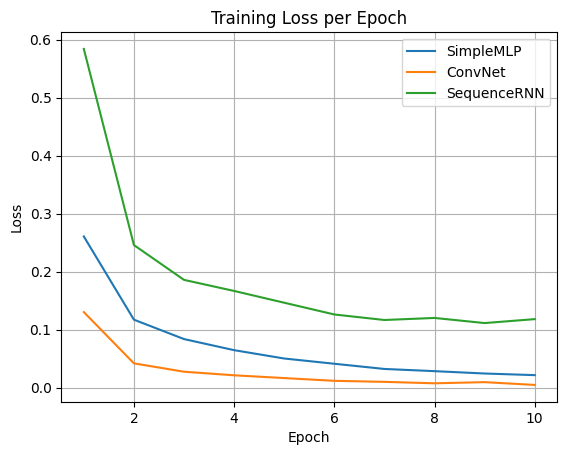

In [11]:

plt.plot(range(1, num_epochs+1), mlp_loss_list, label='SimpleMLP')
plt.plot(range(1, num_epochs+1), cnn_loss_list, label='ConvNet')
plt.plot(range(1, num_epochs+1), rnn_loss_list, label='SequenceRNN')
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
